In [29]:
import glob
import os
import cv2
import numpy as np
from keras import utils
import warnings
import matplotlib.pyplot as plt
import numpy as np
from keras import Sequential
from keras import backend as K, utils
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import rmsprop
import h5py
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
def get_image(label, x, y):
    for i in range(0, len(y)):
        if np.argmax(y[i]) == label:
            return x[i]
    return None


def image_subset(index, x, y):
    xs = []
    ys = []
    for i in range(len(x)):
        if y[i] < index:
            xs.append(x[i])
            ys.append(y[i])
    return np.array(xs), np.array(ys)


def get_images(path):
    images = []
    labels = []
    names = []
    i = 0
    for fruit_dir_path in glob.glob(path):
        fruit_label = fruit_dir_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)

            image = cv2.resize(image, (45, 45))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            images.append(image)
            names.append(fruit_label)
            labels.append(i)
        i += 1

    images = np.array(images)
    labels = np.array(labels)
    return images, labels, i


num_classes = 5

x_train, y_train, _ = get_images("C:\\Users\\dkdin\\Desktop\\DataMining\\fruits\\fruits-360\\Training\\*")
x_test, y_test, _ = get_images("C:\\Users\\dkdin\\Desktop\\DataMining\\fruits\\fruits-360\\Validation\\*")

x_train, y_train = image_subset(num_classes, x_train, y_train)
x_test, y_test = image_subset(num_classes, x_test, y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

Train on 2449 samples, validate on 817 samples
Epoch 1/20
 - 25s - loss: 0.9305 - acc: 0.7097 - val_loss: 0.6987 - val_acc: 0.6536
Epoch 2/20
 - 27s - loss: 0.3423 - acc: 0.9224 - val_loss: 0.2779 - val_acc: 0.9645
Epoch 3/20
 - 25s - loss: 0.1930 - acc: 0.9506 - val_loss: 0.1592 - val_acc: 0.9596
Epoch 4/20
 - 25s - loss: 0.1440 - acc: 0.9628 - val_loss: 0.1981 - val_acc: 0.9315
Epoch 5/20
 - 25s - loss: 0.1215 - acc: 0.9628 - val_loss: 0.0953 - val_acc: 0.9890
Epoch 6/20
 - 25s - loss: 0.0918 - acc: 0.9751 - val_loss: 0.0750 - val_acc: 0.9841
Epoch 7/20
 - 24s - loss: 0.0531 - acc: 0.9882 - val_loss: 0.0510 - val_acc: 0.9988
Epoch 8/20
 - 27s - loss: 0.0635 - acc: 0.9829 - val_loss: 0.0485 - val_acc: 0.9951
Epoch 9/20
 - 27s - loss: 0.0534 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9988
Epoch 10/20
 - 27s - loss: 0.0534 - acc: 0.9820 - val_loss: 0.0280 - val_acc: 0.9988
Epoch 11/20
 - 26s - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0322 - val_acc: 0.9988
Epoch 12/20
 - 27s - loss: 

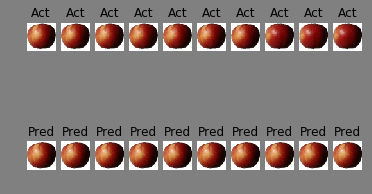

In [31]:
batch_size = 32
num_classes = 5
epochs = 20

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 padding='same',
                 input_shape=(45, 45, 3)))
model.add(Conv2D(32, (3, 3),
                 activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = rmsprop(lr=0.0001, decay=1e-6)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          verbose=2)

score = model.evaluate(x_test, y_test)
print('Test loss: {0}'.format(score[0]))
print('Test accuracy: {0}'.format(score[1]))

fig = plt.figure('Predictions on CIFAR', facecolor='gray')

predictions = model.predict(x_test, verbose=0)

filename = "C:\\Users\\dkdin\\Desktop\\DataMining\\Results\\fruitstrainedmodel.h5"
model.save(filename)

for i in range(10):
    subplt = plt.subplot(2, 10, i + 1)
    hot_index = np.argmax(predictions[i])
    subplt.set_title('Act')
    subplt.axis('off')
    subplt.imshow(x_test[i])
    plt.draw()
    subplt = plt.subplot(2, 10, 10 + i + 1)
    subplt.set_title('Pred')
    subplt.axis('off')
    subplt.imshow(get_image(hot_index, x_train, y_train))
    plt.draw()
fig.savefig('cnn.png')
plt.show()

K.clear_session()